# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [55]:
import pandas as pd 
import numpy as np 
import seaborn as sea
import matplotlib.pyplot as plt

from sklearn.metrics import rand_score
from sklearn.preprocessing import StandardScaler , OneHotEncoder , LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans



## Load the Data

In [16]:
df = pd.read_csv('Datasets\Traffic_Accidents.csv')

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\zyadf\AppData\Local\Temp\ipykernel_14380\3554163362.py:1: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_csv('Datasets\Traffic_Accidents.csv')


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [17]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


In [18]:
df.shape

(52000, 26)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [20]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,51678.000000,52000.000000,50959.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51912.000000,52000.000000
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.837145,1.834327,1.354756,4.130712,349.542558,4.080519,997.078077,39.148558,2.672673,384.503058,1.359397,2009.401788
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.402582,0.727856,0.855220,1.926217,259.504721,1.428056,1806.405065,14.212826,3.205080,1304.989395,0.479868,3.006997
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,128.500000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,716.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


In [21]:
df.isna().sum()

Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                               322
Number_of_Vehicles                                0
Number_of_Casualties                           1041
Date                                              0
Day_of_Week                                       0
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
2nd_Road_Class                                    0
2nd_Road_Number                                   0
Pedestrian_Crossing-Human_Control                 0
Pedestrian_C

In [22]:
df.duplicated().sum()

43

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [23]:
df = df.drop_duplicates()

In [24]:
df.duplicated().sum()

0

In [25]:
df['size'] = df['Longitude'] * df ['Latitude']

In [26]:
df =df.drop('Date',axis=1)

In [27]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,size
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,6,556,...,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009,14.090285
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,1,26,...,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010,-22.205927
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,4,746,...,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005,-166.144369
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,7,84,...,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007,-154.373179
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,3,257,...,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013,-116.865545


In [28]:
df = df.dropna(axis=0)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49986 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        49986 non-null  float64
 1   Location_Northing_OSGR                       49986 non-null  float64
 2   Longitude                                    49986 non-null  float64
 3   Latitude                                     49986 non-null  float64
 4   Police_Force                                 49986 non-null  int64  
 5   Accident_Severity                            49986 non-null  float64
 6   Number_of_Vehicles                           49986 non-null  int64  
 7   Number_of_Casualties                         49986 non-null  float64
 8   Day_of_Week                                  49986 non-null  int64  
 9   Local_Authority_(District)                   49986 non-null  int64  
 10  Loc

In [30]:
la = LabelEncoder()
df['Local_Authority_(Highway)'] = la.fit_transform(df['Local_Authority_(Highway)'])
df['Road_Type'] = la.fit_transform(df['Road_Type'])
df['Pedestrian_Crossing-Human_Control'] = la.fit_transform(df['Pedestrian_Crossing-Human_Control'])
df['Pedestrian_Crossing-Physical_Facilities'] = la.fit_transform(df['Pedestrian_Crossing-Physical_Facilities'])
df['Light_Conditions'] = la.fit_transform(df['Light_Conditions'])
df['Weather_Conditions'] = la.fit_transform(df['Weather_Conditions'])
df['Road_Surface_Conditions'] = la.fit_transform(df['Road_Surface_Conditions'])
df['Did_Police_Officer_Attend_Scene_of_Accident'] = la.fit_transform(df['Did_Police_Officer_Attend_Scene_of_Accident'])





In [31]:
df['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
1.0    31975
2.0    18010
3.0        1
Name: count, dtype: int64

In [32]:
x = df.drop('Urban_or_Rural_Area', axis=1)
y =df['Urban_or_Rural_Area']

In [33]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=20,random_state=0)

In [34]:
sc =StandardScaler()
x_train_scaled =sc.fit_transform(x_train)
x_test_scaled  =sc.transform(x_test)

In [35]:
pca = PCA(n_components=2)
x_train_pcs = pca.fit_transform(x_train)
x_test_pcs  = pca.fit_transform(x_test)


In [36]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,size
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,6,556,...,0,2,2,0,4,1,2.0,1,2009,14.090285
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,1,26,...,0,2,2,2,1,0,1.0,1,2010,-22.205927
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,4,746,...,4055,2,2,4,1,0,1.0,1,2005,-166.144369
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,7,84,...,0,2,2,4,5,5,1.0,1,2007,-154.373179
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,3,257,...,0,2,2,4,1,0,1.0,1,2013,-116.865545


## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [37]:
df['Urban_or_Rural_Area'].value_counts() 

# a chose the "Urban_or_Rural_Area" feature for it's small distrbution witch is good for clustring algorethem

Urban_or_Rural_Area
1.0    31975
2.0    18010
3.0        1
Name: count, dtype: int64

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

<Axes: xlabel='Longitude', ylabel='Latitude'>

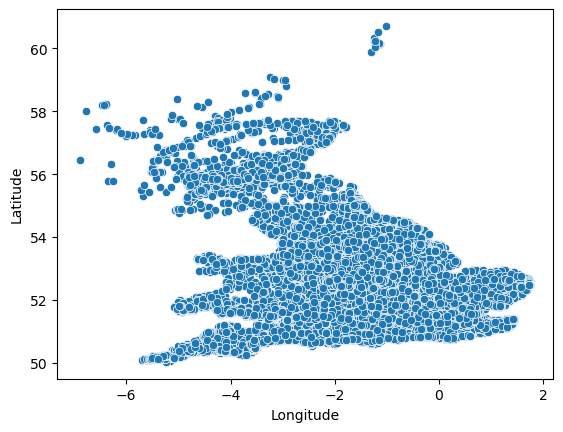

In [38]:
sea.scatterplot(df,x='Longitude',y='Latitude')

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [40]:
inartia = []
k_range = range(1,11)

for k in k_range:
    Kmeans = KMeans(n_clusters=k, init='k-means++',max_iter=300, n_init=10, random_state=0)
    Kmeans.fit(x_train_pcs)
    inartia.append(Kmeans.inertia_)

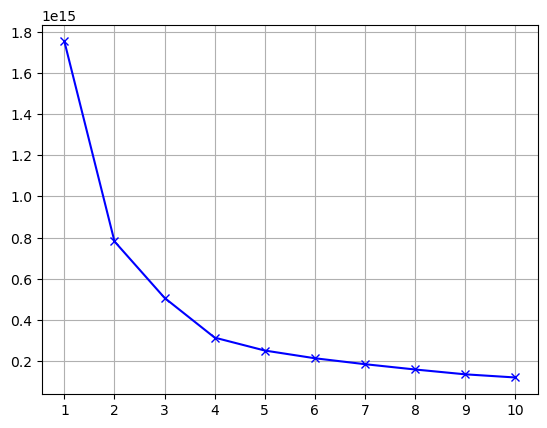

In [43]:
fig = plt.figure(0)
plt.grid(True)
plt.plot(k_range, inartia,'bx-')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [45]:
k = 6

clusters = {}
np.random.seed(23)

for idx in range(k):
      center = x_train_pcs[np.random.randint(0,x_train_pcs.shape[0])]
      points = []
      cluster = {
      'center': center,
      'points': points
      }
      clusters[idx] = cluster

clusters

{0: {'center': array([  5319.91728291, 228482.45361174]), 'points': []},
 1: {'center': array([-137446.97876079,  -99840.60261632]), 'points': []},
 2: {'center': array([372308.70032457,  91497.87201223]), 'points': []},
 3: {'center': array([-1904.31050136, 27619.90301057]), 'points': []},
 4: {'center': array([-168205.03888529,  -67759.54298152]), 'points': []},
 5: {'center': array([-213538.82076796,  -35894.42505143]), 'points': []}}

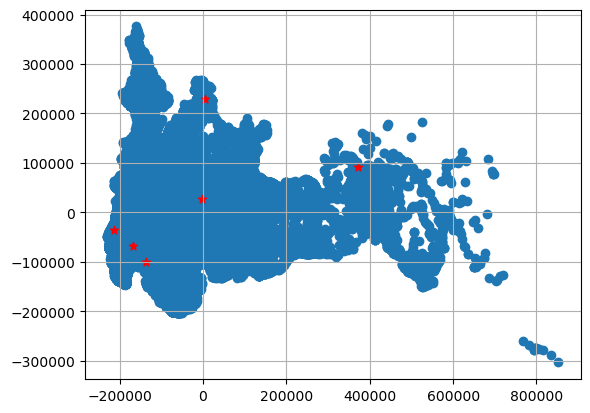

In [48]:
plt.scatter(x_train_pcs[:,0],x_train_pcs[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()

In [49]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

def pred_cluster(x_train_pcs,clusters):
  pred = []
  for i in range(x_train_pcs.shape[0]):
    dist = []
    for j in range(k):
      dist.append(distance(x_train_pcs[i],clusters[j]['center']))
    pred.append(np.argmin(dist))
  return pred
def assign_cluster(x_train_pcs,clusters):
  for idx in range(x_train_pcs.shape[0]):
    dist = []
    curr_x = x_train_pcs[idx]

    for i in range(k):
      dis = distance(curr_x,clusters[i]['center'])
      dist.append(dis)
    curr_cluster = np.argmin(dist)
    clusters[curr_cluster]['points'].append(curr_x)
  return clusters


def update_cluster(x_train_pcs,clusters):
  for i in range(k):
    points = np.array(clusters[i]['points'])
    if points.shape[0] > 0:
        center = np.mean(points,axis = 0)
        clusters[i]['center'] = center
        clusters[i]['points'] = []
  return clusters

In [51]:
clusters = assign_cluster(x_train_pcs,clusters)
clusters = update_cluster(x_train_pcs,clusters)
pred = pred_cluster(x_train_pcs,clusters)

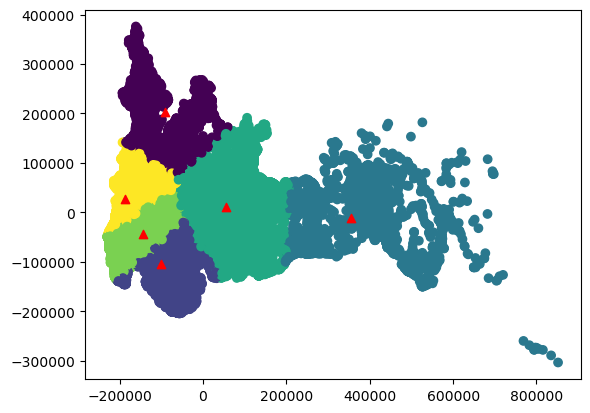

In [53]:
plt.scatter(x_train_pcs[:,0],x_train_pcs[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [57]:
rand_score(y_train, pred)


0.4957824798297046

## Plot the data points with their predicted cluster center

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?